#  CLIRAD CO2 B10 cosz1.0 mls75 (181025) + ktable

### Input Parameter Options

    CO2 Band 10 (4400 - 8200)
    cosz = 1.0
    rsfc = 0.0
    vstar = 4400
    nband = 380
    nv = 10000
    dv = 0.001
    ng = 6 
    nref = 2
    p_refs = / 10, 300 /
    t_refs = / 250, 250 /
    ng_refs = / 3, 3 /  
    ng_adju = / 0, 0 /
    data wgt / 2*0.85, 0.8, 0.75, 0.65, 0.85 /
    option_klin = 1
    option_k_lookup = 1 <- note: interpolation with ktable, 0 no, 1 yes
    klin = 2.0e-23
    include 'mls75.pro'
    nl = 52
    nt = 5

### Note
    Work_SW_single_18-10-08.f
    CLIRAD_h2o_co2_ktable_181013r8.f
    All variables were changed real*8 type 
    
    flux_total <- sum of each lbl, lblg, par, diff.
    flux_all    <- lbl, lblg, par for each ig
    heat_all   <- lbl, lblg, par for each ig + total

In [1]:
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

path = 'cosz1.0/mls/'
fname = 'co2_b10_cz1.0_mls75_181025_'

### absmean

In [2]:
absmean = pd.read_table(path+'fort.881',header=None,sep="\s+",keep_default_na=False,index_col=[0],names=['ig','ip','t1','t2','t3','t4','t5'])
absmeanlog = pd.read_table(path+'fort.882',header=None,sep="\s+",keep_default_na=False,index_col=[0],names=['ig','ip','t1','t2','t3','t4','t5'])
ktable = pd.read_table(path+'fort.888',header=None,sep="\s+",keep_default_na=False,index_col=[0],names=['ig','ip','t1','t2','t3','t4','t5'])

In [3]:
## save absmean data to excel
sav = pd.DataFrame(absmean)
sav.to_csv(fname+"absmean.csv",header=True,index=True)
fn = fname+'absmean.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### absmeanlog

In [4]:
## save absmean data to excel
sav = pd.DataFrame(absmeanlog)
sav.to_csv(fname+"absmeanlog.csv",header=True,index=True)
fn = fname+'absmeanlog.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### ktable

In [5]:
## save absmean data to excel
sav = pd.DataFrame(ktable)
sav.to_csv(fname+"ktable.csv",header=True,index=True)
fn = fname+'ktable.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### abscom, dg, ...

In [6]:
dgs = pd.read_table(path+'fort.19',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                   names=['g','abscom(ig)','abscom(ig)/abscom(ig-1)','dg','dgs','dgs/tflux(1)','accu6th','dgs/rSolsum','pref'])
dgs

,abscom(ig),abscom(ig)/abscom(ig-1),dg,dgs,dgs/tflux(1),accu6th,dgs/rSolsum,pref
g,,,,,,,,
1,1.176080e-20,0.000000,0.000303,0.053534,0.000235,0.000235,0.000039,10.0
2,1.020800e-21,0.086796,0.000884,0.170117,0.000747,0.000982,0.000125,10.0
3,8.860160e-23,0.086796,0.003624,0.683622,0.003002,0.003984,0.000500,10.0
4,2.145390e-22,2.421392,0.005738,1.033083,0.004536,0.008520,0.000756,300.0
5,2.000000e-23,0.093223,0.031237,5.798761,0.025461,0.033981,0.004245,300.0
6,1.871480e-31,0.000000,0.958214,220.009882,0.966019,1.000000,0.161050,300.0


### Flux

In [7]:
lbl = pd.read_table(path+'fort.9',header=None,sep="\s+",keep_default_na=False,index_col=[0],names=['hPa','LBL','LBLg'],skiprows=2)
par = pd.read_table(path+'new_ng6_tot.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],names=['hPa','PAR','aa','bb'])
res = pd.concat([lbl,par['PAR'],lbl['LBLg']-lbl['LBL'],par['PAR']-lbl['LBL']],axis=1)
res.rename(columns={0: 'LBLg - LBL',1: 'PAR - LBL'},inplace=True)

In [8]:
## save flux data to excel
sav = pd.DataFrame(res)
sav.to_csv(fname+"flux_diff.csv",header=True,index=True)
fn = fname+'flux_diff.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [9]:
par = pd.read_table(path+'new_ng6_all.flx',header=None,sep="\s+",keep_default_na=False,index_col=[0],
                    names=['hPa','LBL_g1','LBLg_g1','PAR_g1','LBL_g2','LBLg_g2','PAR_g2','LBL_g3','LBLg_g3','PAR_g3',
                           'LBL_g4','LBLg_g4','PAR_g4','LBL_g5','LBLg_g5','PAR_g5','LBL_g6','LBLg_g6','PAR_g6'])

In [20]:
## save flux data to excel
sav = pd.DataFrame(par)
sav.to_csv(fname+"flux_all.csv",header=True,index=True)
fn = fname+'flux_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

### Figures

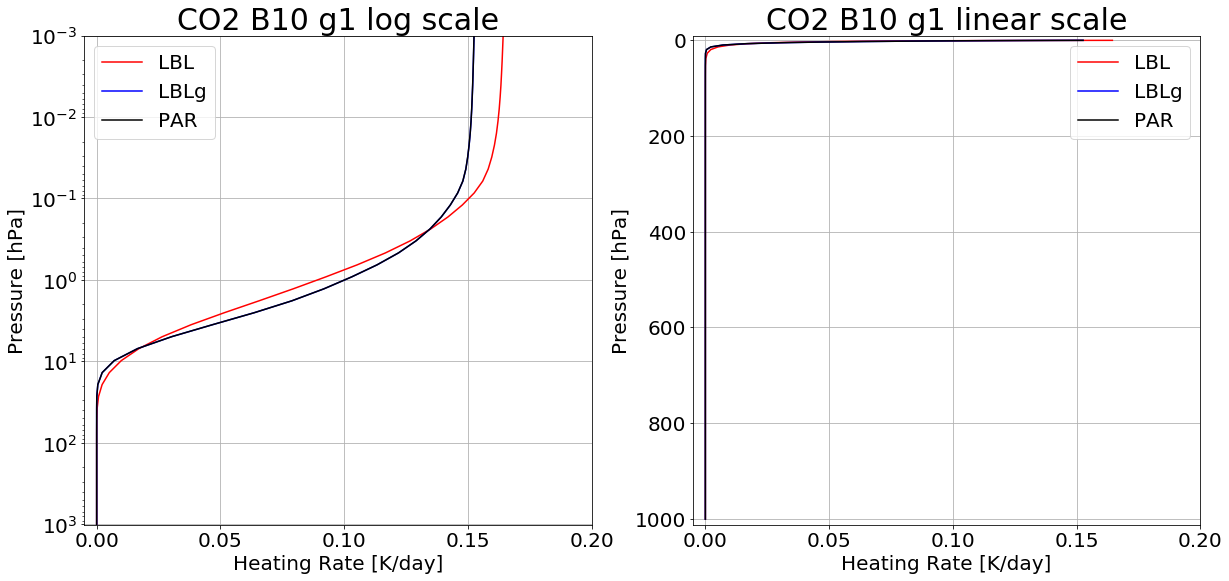

In [11]:
htr = pd.read_table(path+'new_ng6_all.htr',header=None,sep="\s+",keep_default_na=False,
                    names=['hPa','LBL_g1','LBLg_g1','PAR_g1','LBL_g2','LBLg_g2','PAR_g2','LBL_g3','LBLg_g3','PAR_g3'
                          ,'LBL_g4','LBLg_g4','PAR_g4','LBL_g5','LBLg_g5','PAR_g5','LBL_g6','LBLg_g6','PAR_g6'])

params = {'figure.figsize': (20,9),'legend.fontsize': 20,'axes.labelsize': 20,'axes.titlesize': 30,'xtick.labelsize': 20,'ytick.labelsize': 20}
plt.rcParams.update(params)

# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.2,1013,0.001])
plt.grid()
plt.title('CO2 B10 g1 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.2,1013,-10])
plt.grid()
plt.title('CO2 B10 g1 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g1'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g1'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g1'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

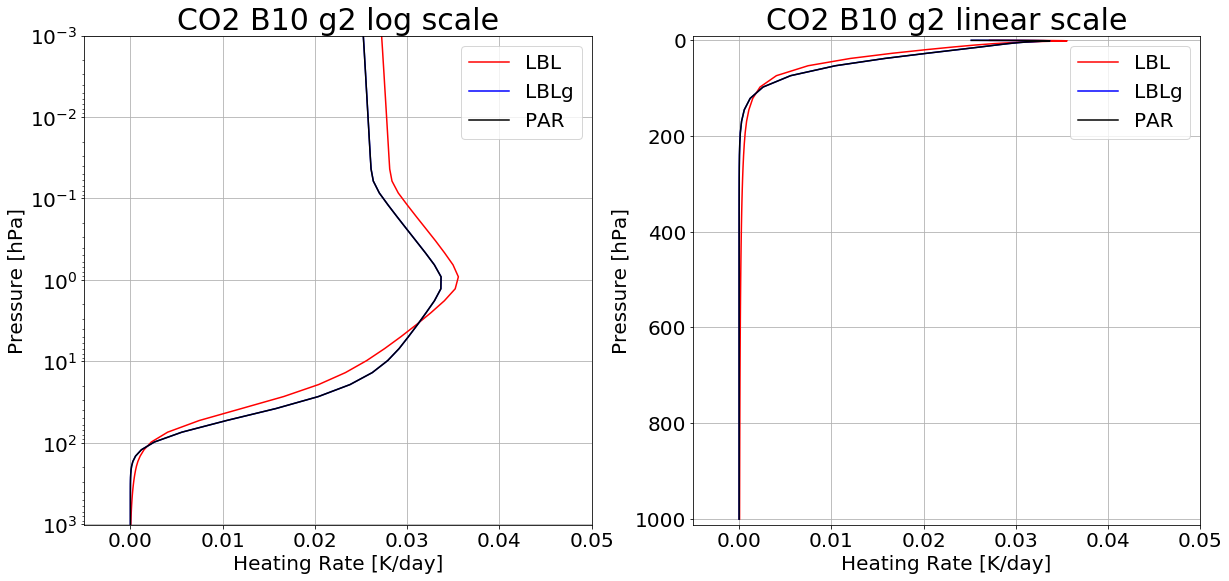

In [12]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.05,1013,0.001])
plt.grid()
plt.title('CO2 B10 g2 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.05,1013,-10])
plt.grid()
plt.title('CO2 B10 g2 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g2'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g2'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g2'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

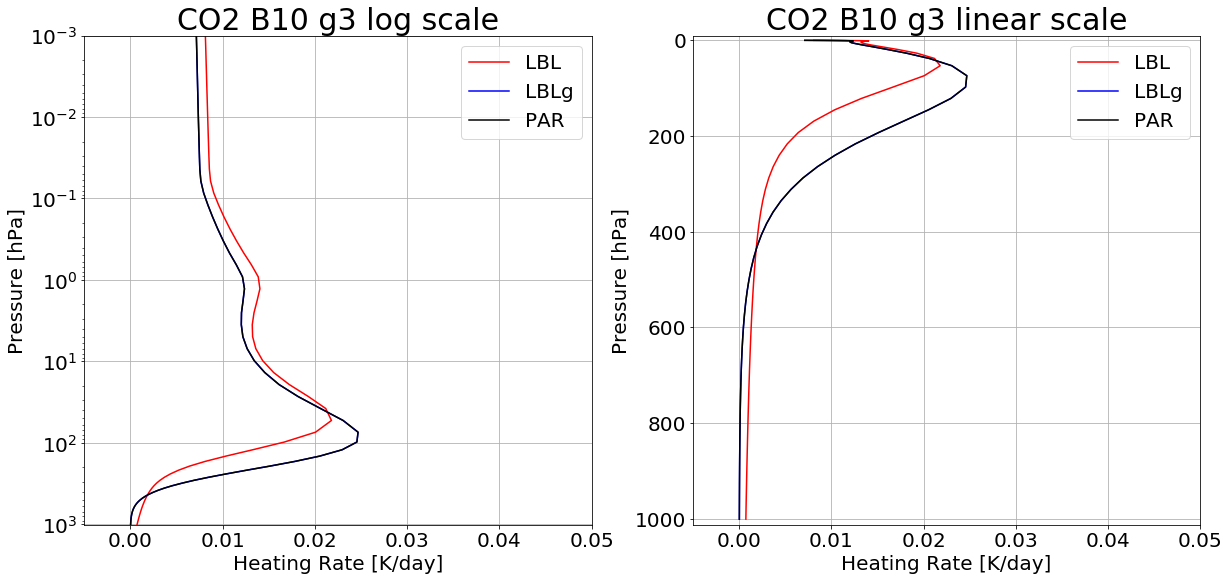

In [13]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.05,1013,0.001])
plt.grid()
plt.title('CO2 B10 g3 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.05,1013,-10])
plt.grid()
plt.title('CO2 B10 g3 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g3'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g3'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g3'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

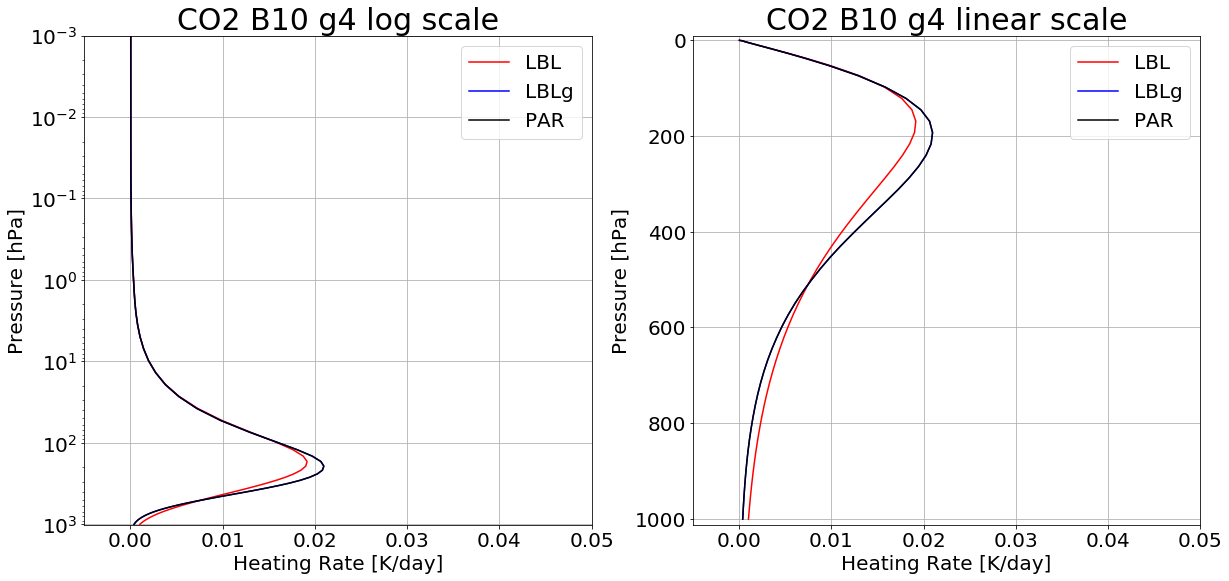

In [14]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.05,1013,0.001])
plt.grid()
plt.title('CO2 B10 g4 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.05,1013,-10])
plt.grid()
plt.title('CO2 B10 g4 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g4'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g4'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g4'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

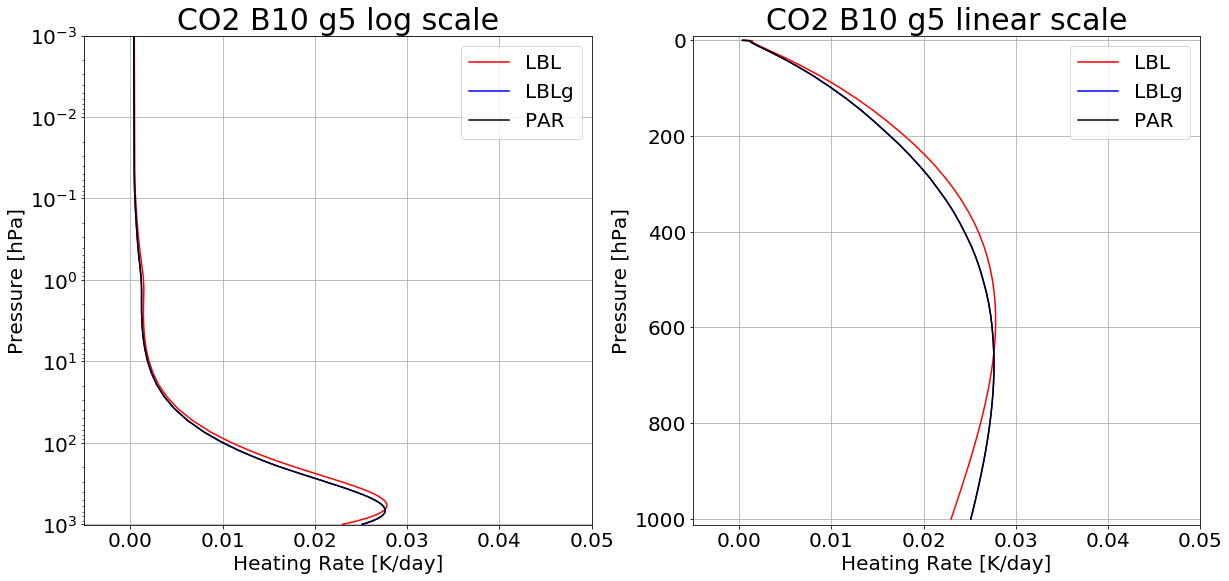

In [15]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.05,1013,0.001])
plt.grid()
plt.title('CO2 B10 g5 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.05,1013,-10])
plt.grid()
plt.title('CO2 B10 g5 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g5'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g5'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g5'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

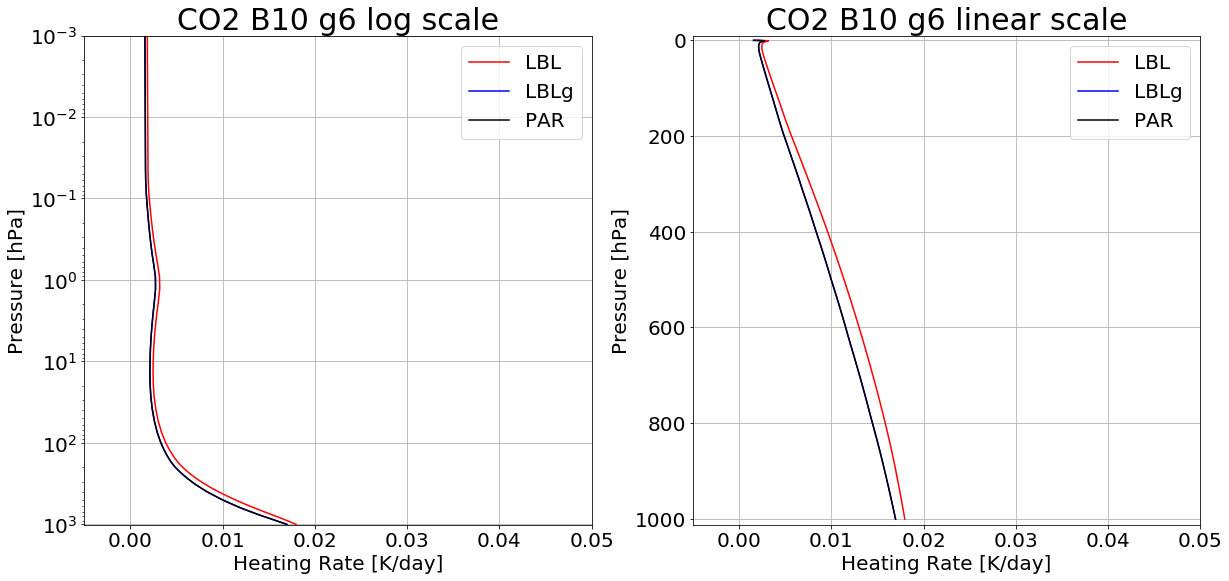

In [16]:
# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.05,1013,0.001])
plt.grid()
plt.title('CO2 B10 g6 log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.05,1013,-10])
plt.grid()
plt.title('CO2 B10 g6 linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(htr['LBL_g6'],htr['hPa'],label='LBL',color='red')
plt.plot(htr['LBLg_g6'],htr['hPa'],label='LBLg',color='blue')
plt.plot(htr['PAR_g6'],htr['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

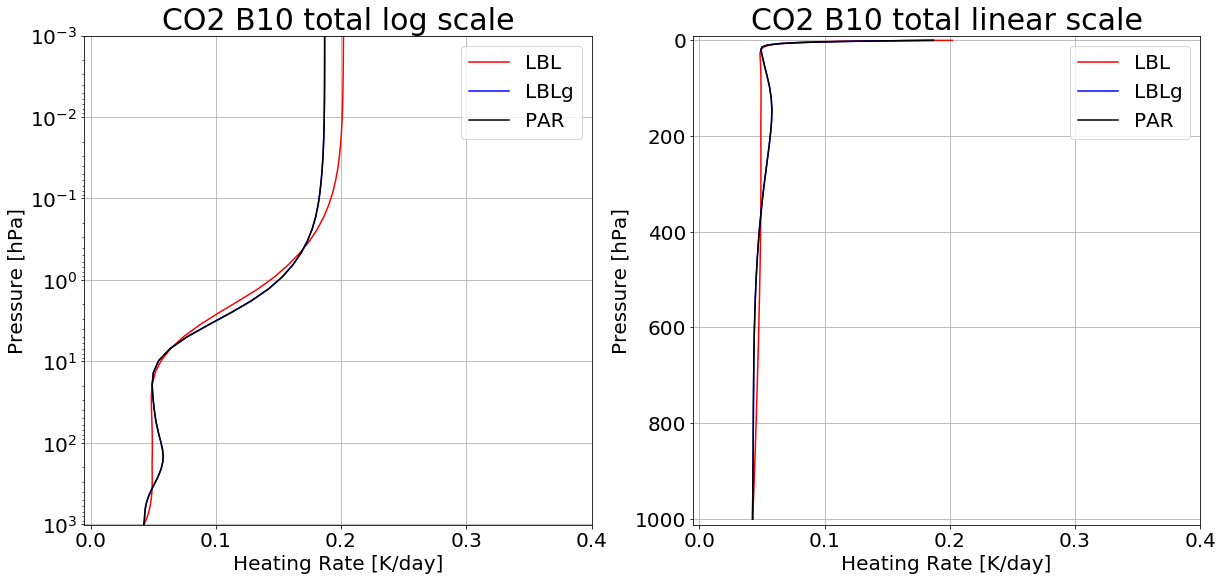

In [22]:
lbl = pd.read_table(path+'fort.10',header=None,sep="\s+",keep_default_na=False,names=['hPa','LBL','LBLg'])
new = pd.read_table(path+'new_ng6_tot.htr',header=None,sep="\s+",keep_default_na=False,names=['hPa','PAR'])

# log scale
plt.subplot(1,2,1)
plt.axis([-0.005,0.4,1013,0.001])
plt.grid()
plt.title('CO2 B10 total log scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.yscale('log')
plt.plot(lbl['LBL'],lbl['hPa'],label='LBL',color='red')
plt.plot(lbl['LBLg'],lbl['hPa'],label='LBLg',color='blue')
plt.plot(new['PAR'],lbl['hPa'],label='PAR',color='black')
plt.legend()

# linear scale
plt.subplot(1,2,2)
plt.axis([-0.005,0.4,1013,-10])
plt.grid()
plt.title('CO2 B10 total linear scale')
plt.ylabel('Pressure [hPa]')
plt.xlabel('Heating Rate [K/day]')
plt.plot(lbl['LBL'],lbl['hPa'],label='LBL',color='red')
plt.plot(lbl['LBLg'],lbl['hPa'],label='LBLg',color='blue')
plt.plot(new['PAR'],lbl['hPa'],label='PAR',color='black')
plt.legend()

plt.show()

In [18]:
## save heating rate to excel for lbl
df = pd.concat([htr,lbl['LBL'],lbl['LBLg'],new['PAR']],axis=1)
df.rename(columns={'LBL': 'LBL_tot','LBLg': 'LBLg_tot','PAR': 'PAR_tot'},inplace=True)
sav = pd.DataFrame(df)
sav.to_csv(fname+"heat_all.csv",header=True,index=False)
fn = fname+'heat_all.csv'
sav.to_csv(fn)
html_download = '''
Download: <a href="./{fname}">{fname}</a>'''.format(fname=fn)
display.display(display.HTML(html_download))

In [19]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')